In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Loading and inspecting data
df = pd.read_csv('E:\\reserach paper\\seattle-weather.csv')
print(df.head())



         date  precipitation  temp_max  temp_min  wind  weather
0  01-01-2012            0.0      12.8       5.0   4.7  drizzle
1  02-01-2012           10.9      10.6       2.8   4.5     rain
2  03-01-2012            0.8      11.7       7.2   2.3     rain
3  04-01-2012           20.3      12.2       5.6   4.7     rain
4  05-01-2012            1.3       8.9       2.8   6.1     rain


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [4]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: xlabel='weather', ylabel='precipitation'>

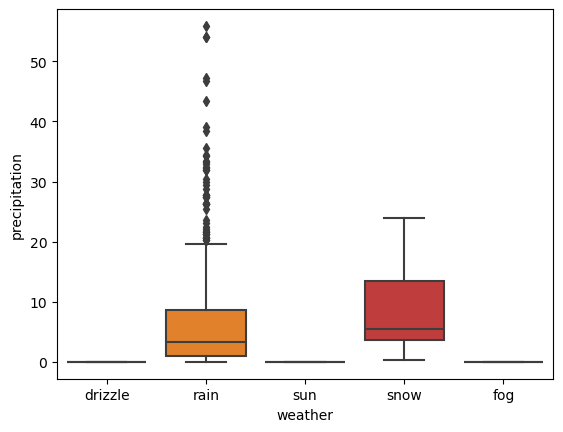

In [5]:
sns.boxplot(x='weather', y='precipitation', data=df)


In [6]:
# Data preprocessing
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Data preprocessing
df['date'] = pd.to_datetime(df['date'], dayfirst=True)  # Fixes date format issue
df['weather'] = LabelEncoder().fit_transform(df['weather'])  # Encode categorical weather data
df.dropna(inplace=True)  # Drop rows with missing values


In [7]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


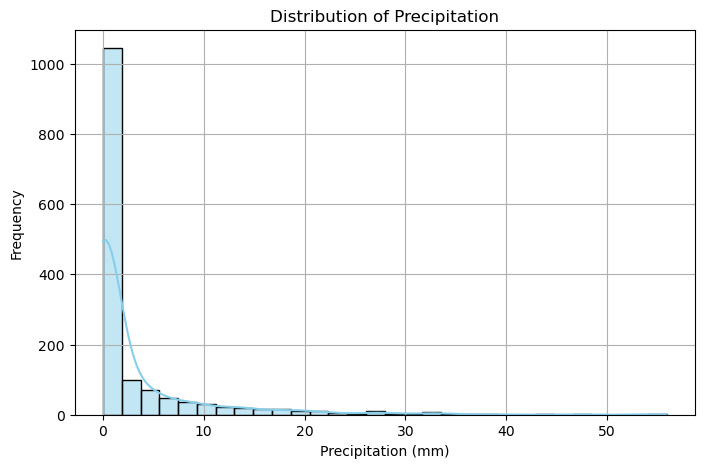

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['precipitation'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [9]:
# Feature and target selection
X = df[['temp_min', 'temp_max', 'wind', 'weather']]
y = df['precipitation']


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


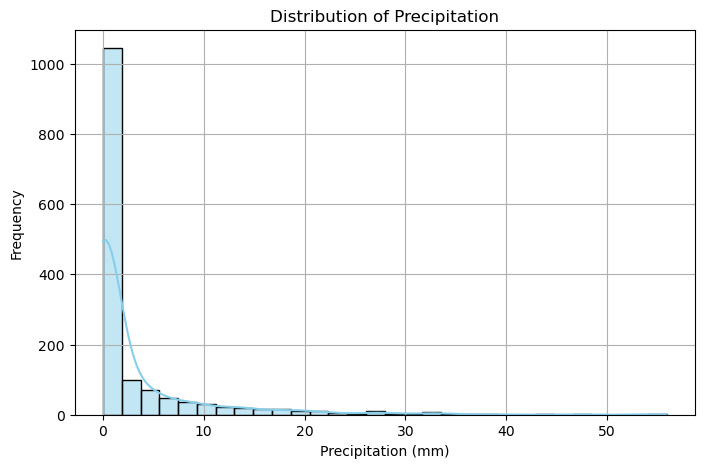

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['precipitation'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


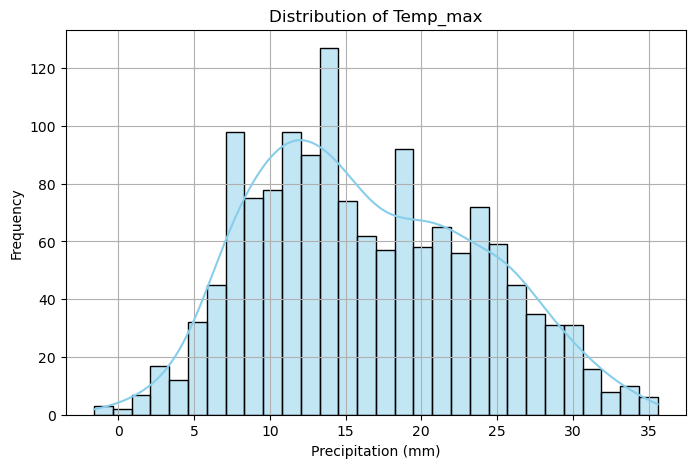

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['temp_max'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Temp_max')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

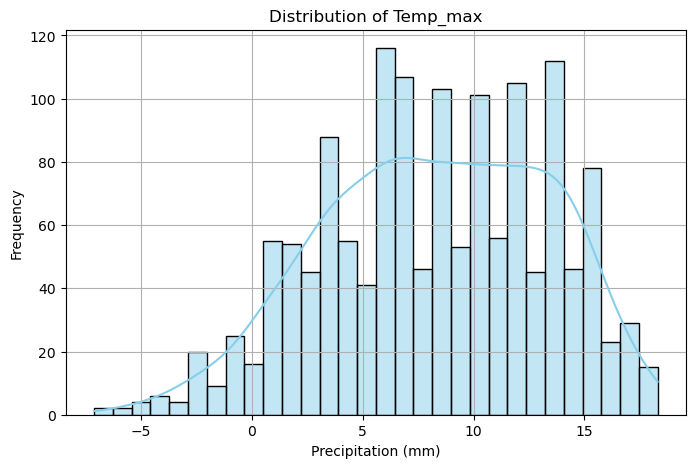

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['temp_min'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Temp_max')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

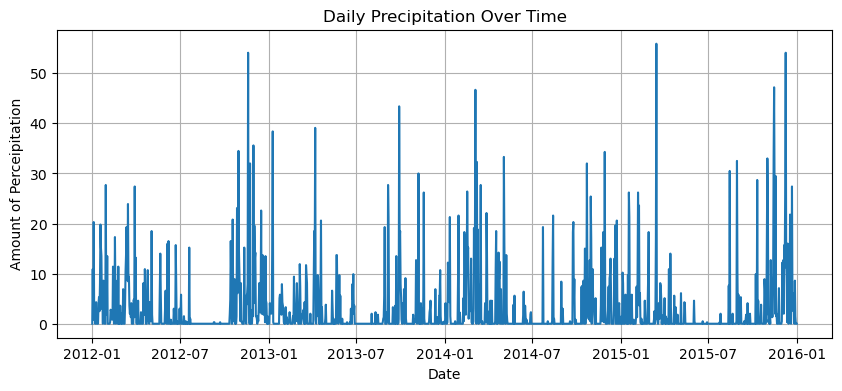

In [15]:
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['precipitation'])
plt.title("Daily Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Amount of Perceipitation",rotation = 90)
plt.grid(True)


<Axes: >

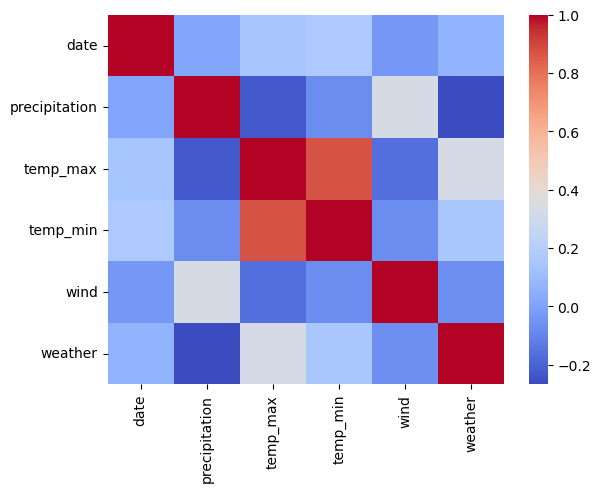

In [16]:
sns.heatmap(df.corr(), cmap='coolwarm')


<Axes: xlabel='weather', ylabel='precipitation'>

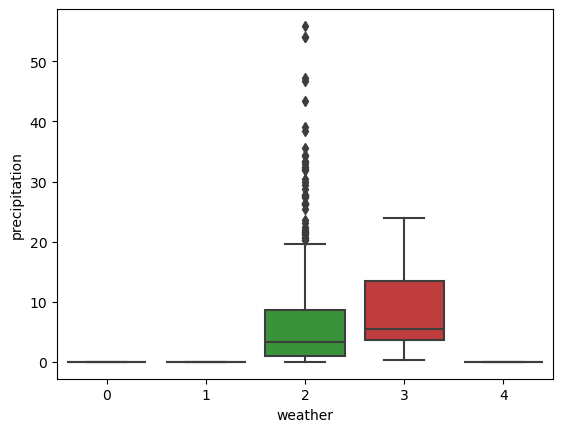

In [17]:
sns.boxplot(x='weather', y='precipitation', data=df)


In [18]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


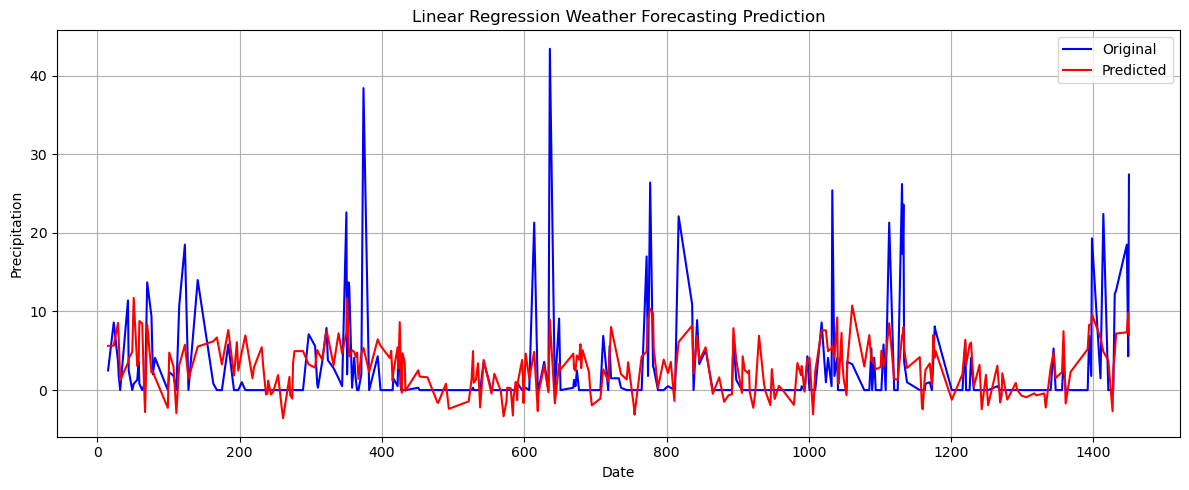

In [19]:
# Create a DataFrame with true and predicted values
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr}, index=y_test.index)

# Sort by date (assuming the index is datetime)
plot_df.sort_index(inplace=True)

# Plot again
plt.figure(figsize=(12, 5))
plt.plot(plot_df.index, plot_df['Actual'], label='Original', color='blue')
plt.plot(plot_df.index, plot_df['Predicted'], label='Predicted', color='red')
plt.title("Linear Regression Weather Forecasting Prediction")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Tuned XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


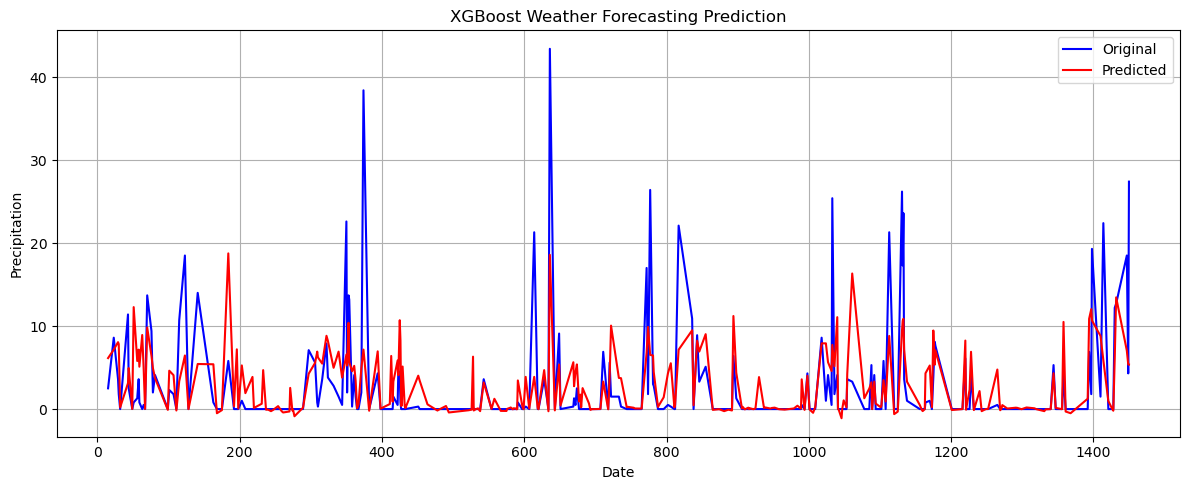

In [21]:
# Create a DataFrame with true and predicted values
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb}, index=y_test.index)

# Sort by date (assuming the index is datetime)
plot_df.sort_index(inplace=True)

# Plot again
plt.figure(figsize=(12, 5))
plt.plot(plot_df.index, plot_df['Actual'], label='Original', color='blue')
plt.plot(plot_df.index, plot_df['Predicted'], label='Predicted', color='red')
plt.title("XGBoost Weather Forecasting Prediction")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_scaled, y_train, epochs=40, batch_size=16, verbose=0)

y_pred_ann = model.predict(X_test_scaled).flatten()



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


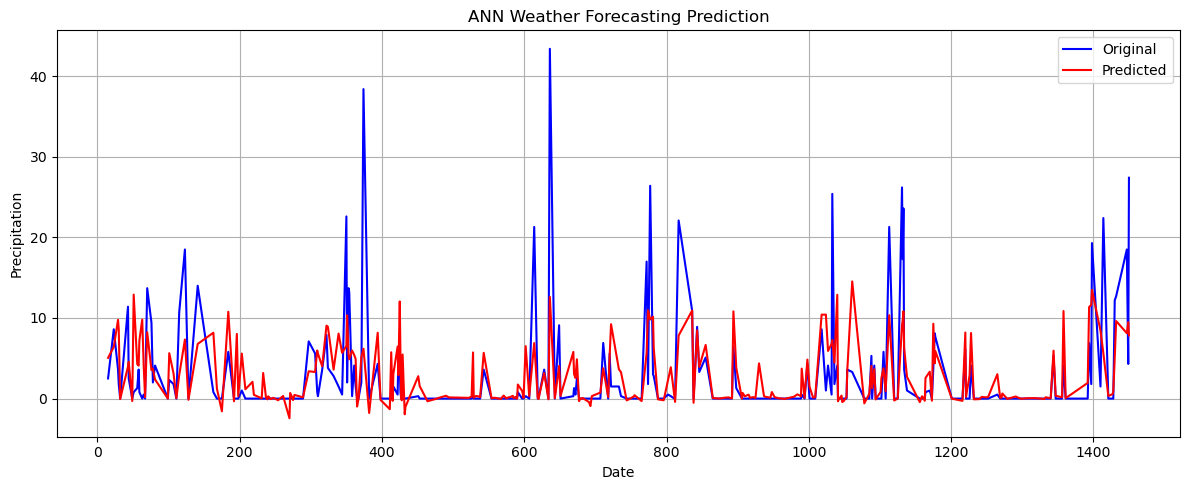

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with true and predicted values for ANN
plot_df_ann = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann}, index=y_test.index)

# Sort by date (assuming index is datetime)
plot_df_ann.sort_index(inplace=True)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(plot_df_ann.index, plot_df_ann['Actual'], label='Original', color='blue')
plt.plot(plot_df_ann.index, plot_df_ann['Predicted'], label='Predicted', color='red')
plt.title("ANN Weather Forecasting Prediction")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# Model evaluation
results = []

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append([model_name, mae, rmse, r2])

evaluate(y_test, y_pred_lr, 'Linear Regression')
evaluate(y_test, y_pred_xgb, 'XGBoost')
evaluate(y_test, y_pred_ann, 'ANN')

results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2 Score'])
print(results_df)


               Model       MAE      RMSE  R2 Score
0  Linear Regression  3.519965  5.543719  0.208403
1            XGBoost  2.615518  5.061253  0.340191
2                ANN  2.650646  5.119751  0.324851


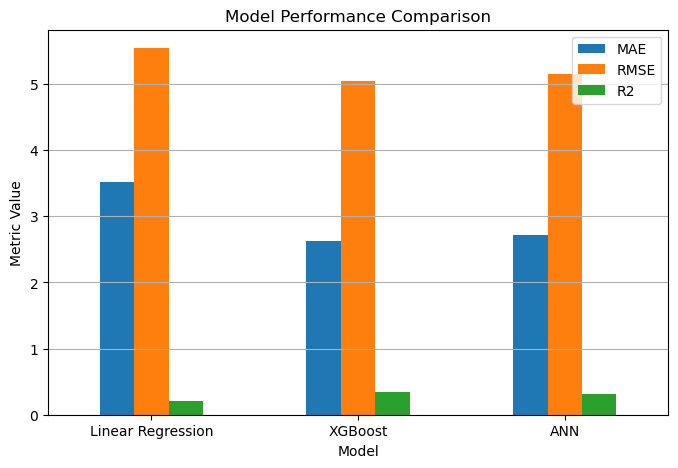

In [25]:
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost', 'ANN'],
    'MAE': [3.519965, 2.632060, 2.722540],
    'RMSE': [5.543719, 5.041446, 5.147949],
    'R2': [0.208403, 0.345345, 0.317393]
})

metrics_df.plot(x='Model', y=['MAE','RMSE','R2'], kind='bar', figsize=(8,5))
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


XGBoost outperformed other models due to its ability to capture non-linear relationships and interactions between weather parameters, which are common in meteorological data.



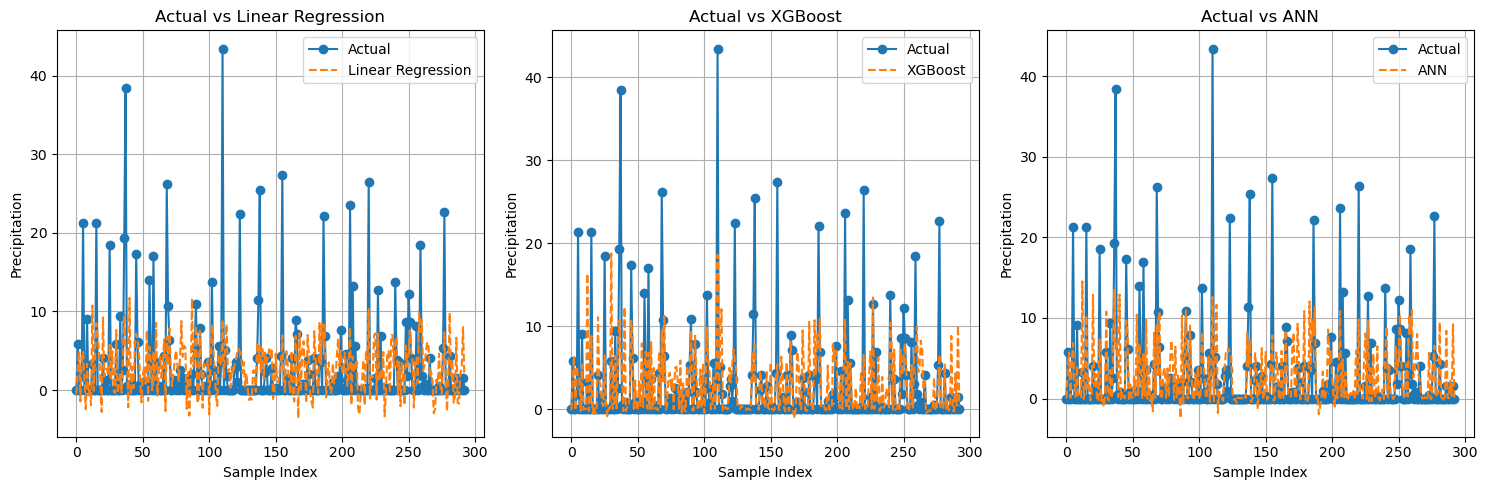

In [26]:
# Creating a DataFrame for actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'LinearRegression_Predicted': y_pred_lr,
    'XGBoost_Predicted': y_pred_xgb,
    'ANN_Predicted': y_pred_ann.flatten()
})

# Creating subplots for each model
plt.figure(figsize=(15,5))

# Linear Regression Plot
plt.subplot(1, 3, 1)
plt.plot(comparison_df['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df['LinearRegression_Predicted'].values, label='Linear Regression', linestyle='--')
plt.title('Actual vs Linear Regression')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)

# XGBoost Plot
plt.subplot(1, 3, 2)
plt.plot(comparison_df['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df['XGBoost_Predicted'].values, label='XGBoost', linestyle='--')
plt.title('Actual vs XGBoost')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)

# ANN Plot
plt.subplot(1, 3, 3)
plt.plot(comparison_df['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df['ANN_Predicted'].values, label='ANN', linestyle='--')
plt.title('Actual vs ANN')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


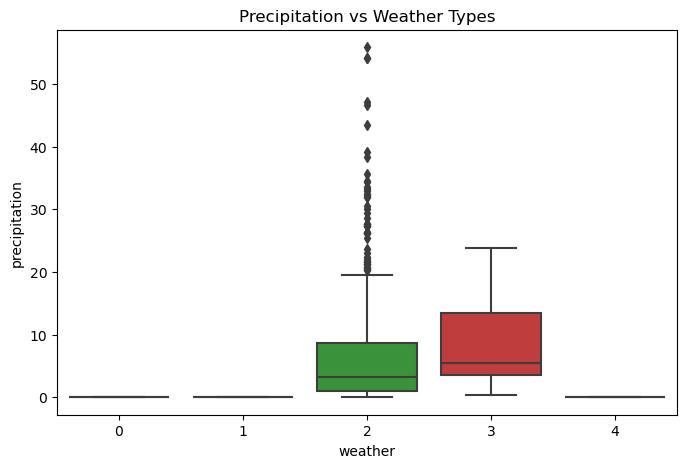

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='weather', y='precipitation', data=df)
plt.title('Precipitation vs Weather Types')
plt.show()


The boxplot reveals that precipitation levels vary significantly across different weather categories. Weather types 2 and 3 are associated with higher and more variable rainfall amounts, while categories 0, 1, and 4 consistently record minimal or no precipitation.

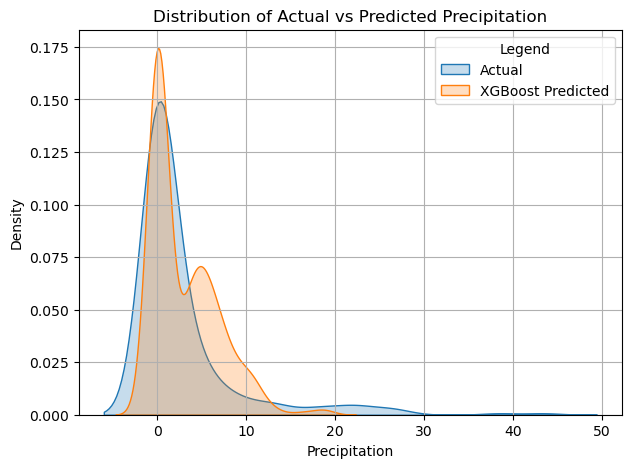

In [28]:
plt.figure(figsize=(7,5))
sns.kdeplot(y_test.values, label='Actual', shade=True)
sns.kdeplot(y_pred_xgb, label='XGBoost Predicted', shade=True)
plt.title('Distribution of Actual vs Predicted Precipitation')
plt.xlabel('Precipitation')
plt.legend(title='Legend')
plt.grid(True)
plt.show()


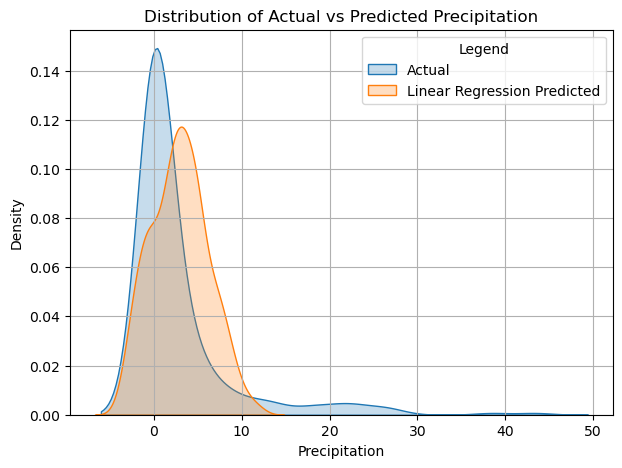

In [32]:
plt.figure(figsize=(7,5))
sns.kdeplot(y_test.values, label='Actual', shade=True)
sns.kdeplot(y_pred_lr, label='Linear Regression Predicted', shade=True)
plt.title('Distribution of Actual vs Predicted Precipitation')
plt.xlabel('Precipitation')
plt.legend(title='Legend')
plt.grid(True)
plt.show()

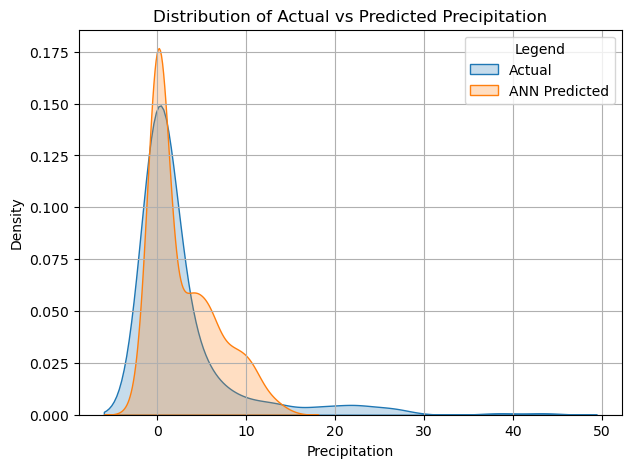

In [34]:
plt.figure(figsize=(7,5))
sns.kdeplot(y_test.values, label='Actual', shade=True)
sns.kdeplot(y_pred_ann, label='ANN Predicted', shade=True)
plt.title('Distribution of Actual vs Predicted Precipitation')
plt.xlabel('Precipitation')
plt.legend(title='Legend')
plt.grid(True)
plt.show()

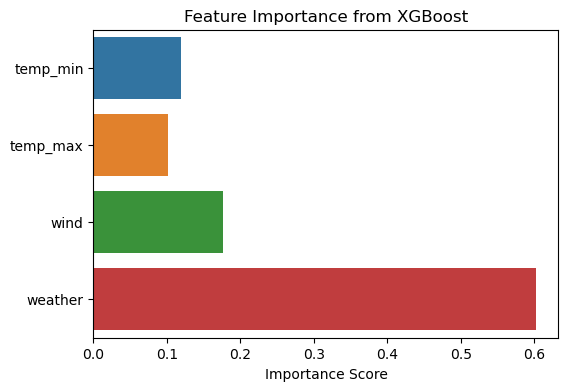

In [29]:
importances = xgb.feature_importances_
features = X_train.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance Score')
plt.show()


In [30]:
# Example input values (adjust values as desired)
new_data = pd.DataFrame({
    'temp_min': [20],
    'temp_max': [45],
    'wind': [8],
    'weather' : [2]
})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict precipitation using trained XGBoost model
predicted_precipitation = xgb.predict(new_data_scaled)

print("For the given weather conditions:")
print("→ Temp Min: " + str(new_data['temp_min'][0]) + "°C")
print("→ Temp Max: " + str(new_data['temp_max'][0]) + "°C")
print("→ Wind: " + str(new_data['wind'][0]) + " km/h")
print("→ Weather (encoded): " + str(new_data['weather'][0]))

print("\nThe predicted precipitation is: " + str(round(predicted_precipitation[0], 2)) + " mm.")


For the given weather conditions:
→ Temp Min: 20°C
→ Temp Max: 45°C
→ Wind: 8 km/h
→ Weather (encoded): 2

The predicted precipitation is: 0.97 mm.


This indicates that under the given conditions, a very light rainfall is expected. This example highlights the model's ability to forecast even minor precipitation events based on meteorological parameters for a specific day.

## Result Analysis

From the evaluation metrics and visualizations, it is observed that the XGBoost model achieved the highest R² score of **0.35**, indicating better overall variance explanation in rainfall prediction. The ANN model demonstrated comparable performance in terms of **MAE** and **RMSE**, with values of **2.72 mm** and **5.15 mm** respectively, closely following XGBoost.

The Actual vs Predicted plots further reveal that both XGBoost and ANN were able to capture the general rainfall trends. However, all models, including XGBoost, showed some difficulty in accurately predicting extremely high precipitation values, which is expected due to limited data size and high variance in rainfall distribution.

Linear Regression consistently underperformed in both error metrics and model fit, reaffirming its limitation in handling non-linear relationships in weather data.


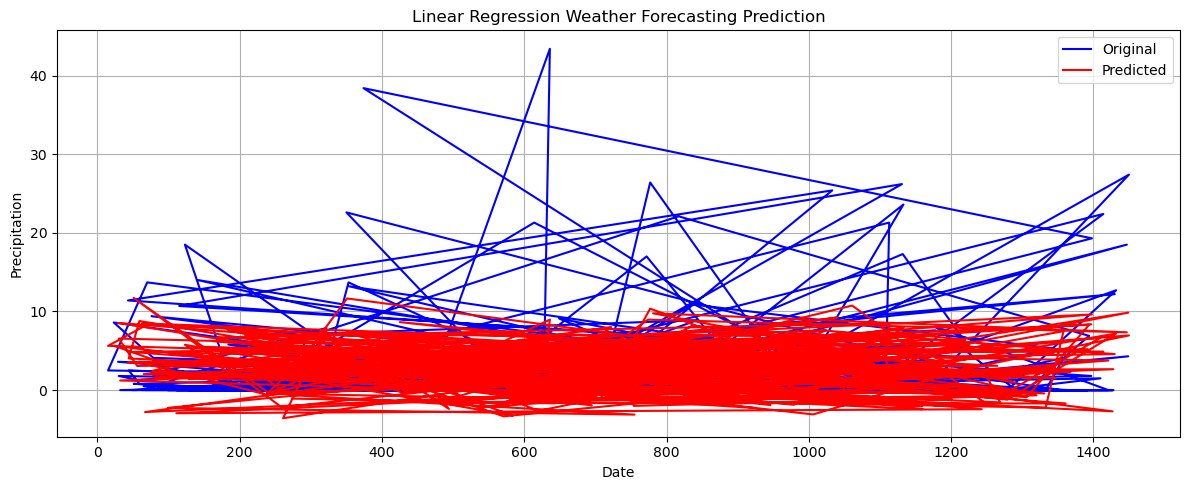

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Replace these with your actual data
# Assuming y_test is a pandas Series with DateTime index and actual values
# y_pred is a numpy array or Series with predicted values

# Sample dummy data
# y_test = pd.Series(actual_values, index=date_range)
# y_pred = pd.Series(predicted_values, index=date_range)

plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label='Original', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Predicted', color='red')

plt.title("Linear Regression Weather Forecasting Prediction")
plt.xlabel("Date")
plt.ylabel("Precipitation")  # or "Sales", depending on your data
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
